# Digit Recognition

# Import Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits

In [4]:
df=load_digits()

# Summarise the Data

In [5]:
print(df.data.shape)

(1797, 64)


In [6]:
print(df.target.shape)

(1797,)


In [7]:
print(df.images.shape)

(1797, 8, 8)


In [8]:
Data_Image_length=len(df.images)

In [9]:
print(Data_Image_length)

1797


# Visualise The Dataset

<Figure size 432x288 with 0 Axes>

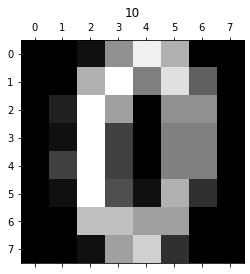

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [10]:
n=10 #no of sample out of 1797
plt.gray()
plt.matshow(df.images[n])
plt.title(n)
plt.show()
print()
df.images[n] #digit data for images


# Segregate the Dataset into independent and Dependent Variable

In [68]:
#X=df.images.reshape((Data_Image_length,-1))

In [15]:
X=df.images.reshape((Data_Image_length,-1))

In [16]:
X.shape

(1797, 64)

In [17]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [18]:
Y=df.target

# Splitting the Dataset into Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [21]:
X_train.shape

(1437, 64)

In [22]:
y_train.shape

(1437,)

# Choosing The Best Kernel

In [52]:
from sklearn.metrics import accuracy_score

In [54]:
l=['linear','poly','sigmoid','rbf']

In [55]:
acc=[]
for i in l:
    model1=SVC(kernel=i)
    model1.fit(X_train,y_train)
    y_pred=model1.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    

<BarContainer object of 4 artists>

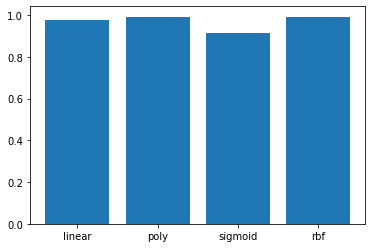

In [56]:
plt.bar(l,acc)

In [63]:
pd.DataFrame([l,acc])

,0,1,2,3
0,linear,poly,sigmoid,rbf
1,0.977778,0.988889,0.913889,0.991667


# Conclusion:
    So we can conclude here that the The Support Vector 'rbf' have maximum Accuracy

# Trainnig The algorithm for best Kernel

In [64]:
from sklearn.svm import SVC

In [65]:
model=SVC(kernel='rbf')

In [66]:
model.fit(X_train,y_train)

SVC()

# Prediction for the Test Data`

In [67]:
y_pred=model.predict(X_test)

# Let Observe the Predicted and Actual Data

In [68]:
pd.DataFrame({'Actual':np.array(y_test).reshape(-1),'Predicted':np.array(y_pred).reshape(-1)})

,Actual,Predicted
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6
...,...,...
355,5,5
356,4,4
357,3,3
358,8,8


# Model validation

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Confussion Matrix

In [70]:
confusion_matrix(y_test,y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

# Classification Report

### classification Report

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# Accuracy Of the Model

In [72]:
print(accuracy_score(y_test,y_pred))

0.9916666666666667
